In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
smokers = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Documents\\Unified Mentor\\Tobacco Use and Mortality  project 2\\data sets\\smokers.csv")

In [3]:
smokers.head()

,Year,Method,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over
0,1974,Unweighted,NaN,46,44,51,52,50,33
1,1976,Unweighted,NaN,42,42,45,48,48,30
2,1978,Unweighted,NaN,40,39,45,45,45,30
3,1980,Unweighted,NaN,39,37,46,44,45,29
4,1982,Unweighted,NaN,35,35,38,39,41,27


In [9]:
# Information about dataset
smokers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         84 non-null     int64 
 1   Method       84 non-null     object
 2   Sex          56 non-null     object
 3   16 and Over  84 non-null     int64 
 4   16-24        84 non-null     int64 
 5   25-34        84 non-null     int64 
 6   35-49        84 non-null     int64 
 7   50-59        84 non-null     int64 
 8   60 and Over  84 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 6.0+ KB


In [5]:
smokers.shape

(84, 9)

In [6]:
smokers.columns

Index(['Year', 'Method', 'Sex', '16 and Over', '16-24', '25-34', '35-49',
       '50-59', '60 and Over'],
      dtype='object')

In [7]:
# Summary Statistics of Numerical Columns
smokers.describe() 

,Year,16 and Over,16-24,25-34,35-49,50-59,60 and Over
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,1997.250000,27.892857,31.345238,33.678571,31.285714,28.952381,18.750000
std,12.142601,7.525087,5.954636,7.287819,8.161873,9.376855,7.441134
min,1974.000000,17.000000,20.000000,20.000000,20.000000,18.000000,10.000000
25%,1987.500000,22.000000,26.000000,28.000000,25.000000,22.000000,13.000000
50%,2000.500000,27.000000,33.000000,34.000000,29.500000,26.000000,16.000000
75%,2007.250000,32.000000,35.000000,37.000000,36.000000,34.250000,23.000000
max,2014.000000,51.000000,47.000000,55.000000,55.000000,53.000000,44.000000


In [10]:
# Check missing value
print(smokers.isnull().sum())

Year            0
Method          0
Sex            28
16 and Over     0
16-24           0
25-34           0
35-49           0
50-59           0
60 and Over     0
dtype: int64


In [11]:
# Fill Null Value with Unknown
smokers['Sex']= smokers['Sex'].fillna("Unknown")

In [12]:
smokers['Sex']

0     Unknown
1     Unknown
2     Unknown
3     Unknown
4     Unknown
       ...   
79     Female
80     Female
81     Female
82     Female
83     Female
Name: Sex, Length: 84, dtype: object

In [14]:
# Check missing value
smokers.isnull().sum()

Year           0
Method         0
Sex            0
16 and Over    0
16-24          0
25-34          0
35-49          0
50-59          0
60 and Over    0
dtype: int64

In [16]:
# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

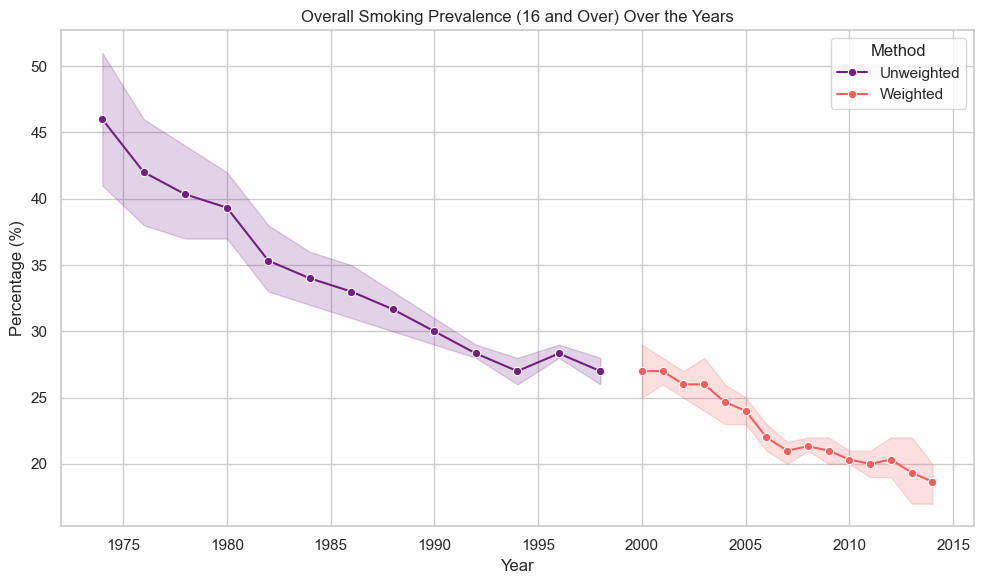

In [18]:
# 1. Trend of overall smoking prevalence over time (16 and Over)
plt.figure()
sns.lineplot(data=smokers, x='Year', y='16 and Over', hue='Method', palette='magma', marker='o')
plt.title('Overall Smoking Prevalence (16 and Over) Over the Years')
plt.ylabel('Percentage (%)')
plt.tight_layout()
plt.show()


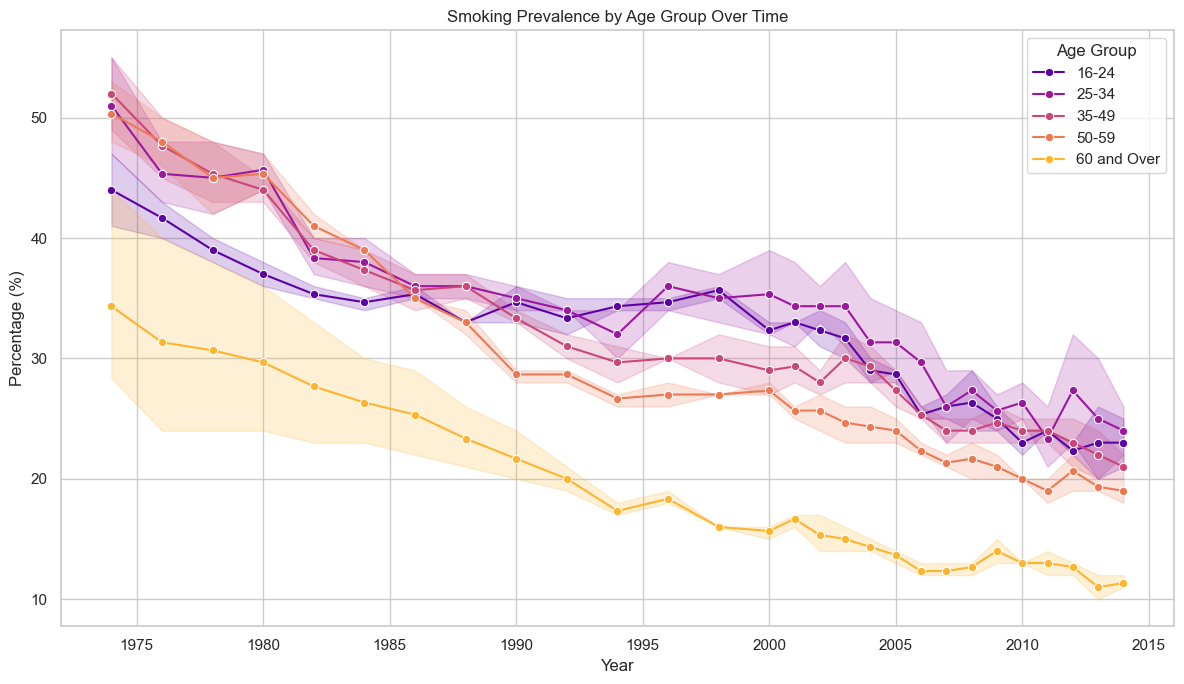

In [27]:
# 2. Smoking prevalence trends by age group over time
age_groups = ['16-24', '25-34', '35-49', '50-59', '60 and Over']

# Melt the data for easier plotting
melted_df = pd.melt(smokers, id_vars=['Year'], value_vars=age_groups, var_name='Age Group', value_name='Prevalence')

# Plot
plt.figure(figsize=(12, 7))
sns.lineplot(data=melted_df, x='Year', y='Prevalence', hue='Age Group', palette='plasma', marker='o')
plt.title('Smoking Prevalence by Age Group Over Time')
plt.ylabel('Percentage (%)')
plt.tight_layout()
plt.show()


### Boxplot of Smoking Prevalence by Age Group


C:\Users\AMAN KUMAR  SINGH\AppData\Local\Temp\ipykernel_2712\850420348.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_df, x='Age Group', y='Prevalence', palette='magma')


Text(0.5, 1.0, 'Distribution of Smoking Rates by Age Group')

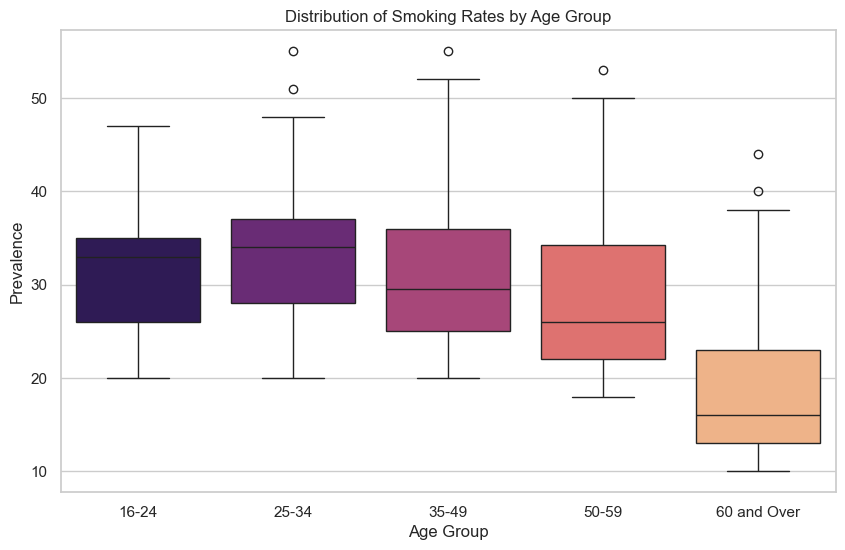

In [34]:
sns.boxplot(data=melted_df, x='Age Group', y='Prevalence', palette='magma')
plt.title('Distribution of Smoking Rates by Age Group')

### Interpretation:
* This helps visualize the variation and median smoking rate per age group.
* Expect to see younger age groups with higher medians and more spread in older groups.

###  Heatmap of Smoking Rates Over Time (Age Group × Year)

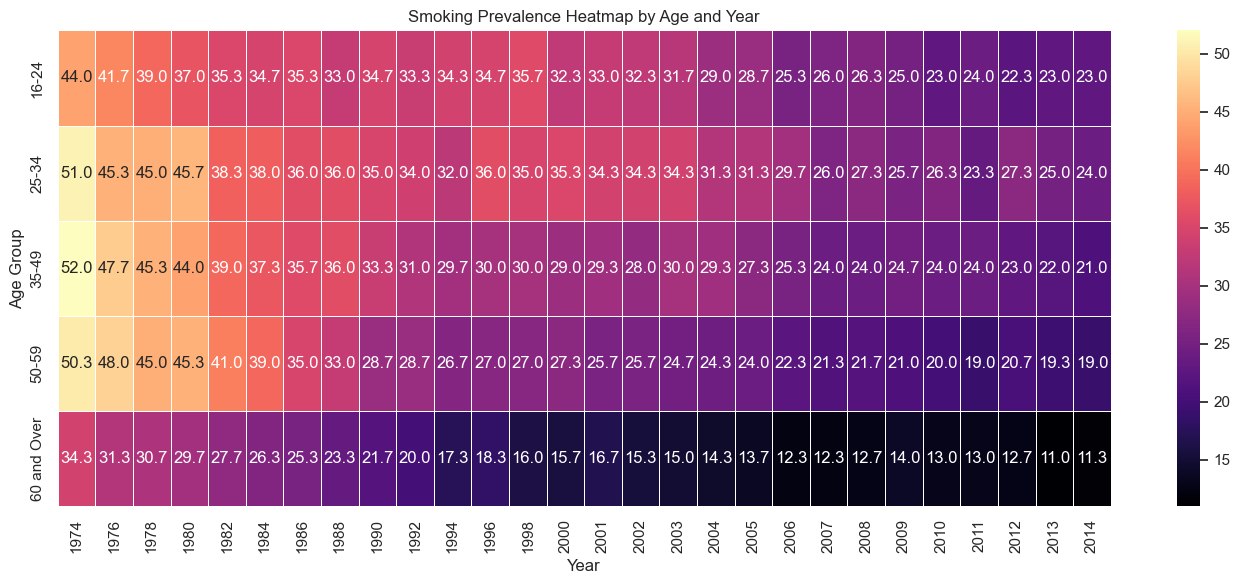

In [45]:
# Use pivot_table with mean aggregation to handle duplicates
pivot_table = melted_df.pivot_table(index='Age Group', columns='Year', values='Prevalence', aggfunc='mean')

# Create heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap='magma', annot=True, fmt=".1f", linewidths=.5)
plt.title('Smoking Prevalence Heatmap by Age and Year')
plt.xlabel('Year')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

### Interpretation:
* Spot which age groups and years had the highest smoking rates.
* Intense colors highlight problem areas in public health.

### Smoking Trends by Gender Over Time

<Axes: xlabel='Year', ylabel='16 and Over'>

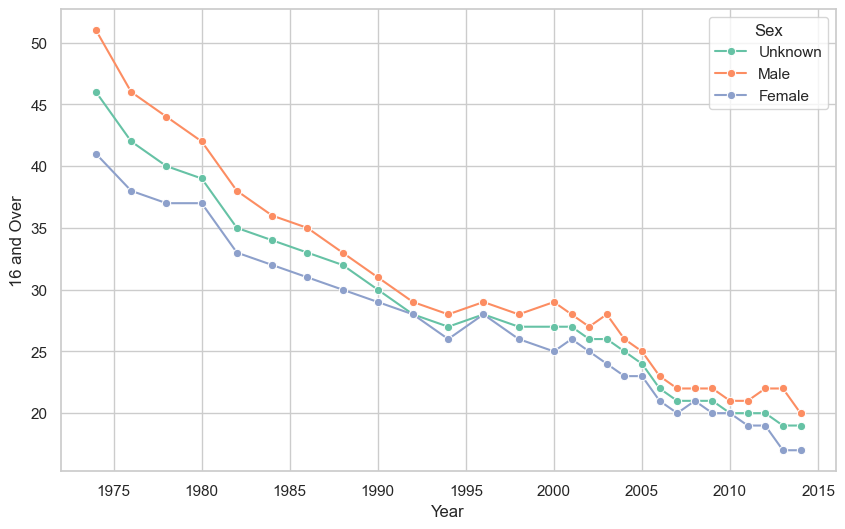

In [36]:
gender_df = smokers.dropna(subset=['Sex'])
sns.lineplot(data=gender_df, x='Year', y='16 and Over', hue='Sex', marker='o', palette='Set2')


### Interpretation:
* Shows how male vs female smoking rates evolved.
* Typically, men smoke more, but gaps may have narrowed over time.

### Percentage Decline in Smoking (Start vs End Year)

In [42]:
start_year = smokers['Year'].min()
end_year = smokers['Year'].max()

start_value = smokers[smokers['Year'] == start_year]['16 and Over'].mean()
end_value = smokers[smokers['Year'] == end_year]['16 and Over'].mean()

decline_percent = ((start_value - end_value) / start_value) * 100


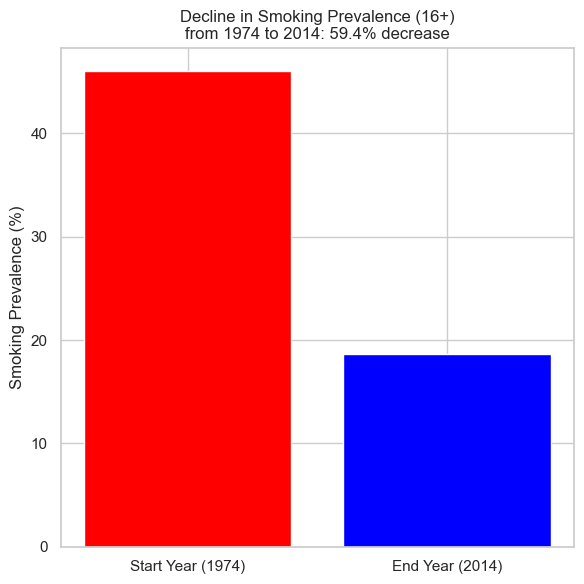

In [44]:
plt.figure(figsize=(6, 6))
plt.bar(['Start Year (' + str(start_year) + ')', 'End Year (' + str(end_year) + ')'], 
        [start_value, end_value], 
        color=['red', 'blue'])
plt.title(f'Decline in Smoking Prevalence (16+)\nfrom {start_year} to {end_year}: {decline_percent:.1f}% decrease')
plt.ylabel('Smoking Prevalence (%)')
plt.tight_layout()
plt.show()


### Interpretation:
This bar chart makes the drop in smoking prevalence easy to understand:
* Left bar: Starting prevalence
* Right bar: Most recent prevalence
* Title summarizes the decline percentage
* Quantifies the total drop in smoking prevalence over 40+ years.
* Useful stat to highlight in project conclusion.

### Trend Slope Estimation with Regression Line

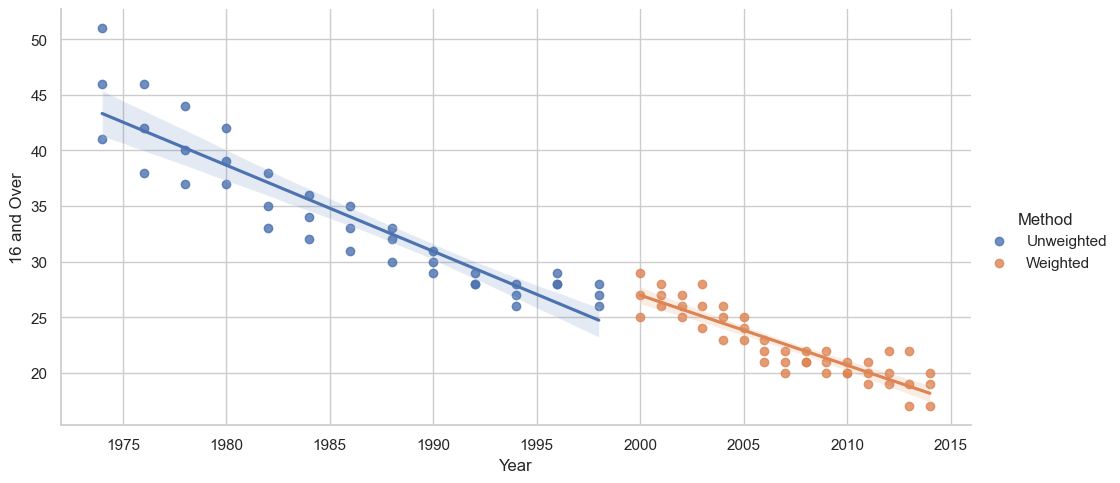

In [41]:
sns.lmplot(data=smokers, x='Year', y='16 and Over', hue='Method', aspect=2)


### Interpretation:
* Fit a regression line to check rate of decline.
* Shows if the decrease is linear or accelerating.

In [46]:
#Total Smokers in years
smokers['Total'] =smokers['16 and Over']+smokers['16-24']+smokers['25-34']+smokers['35-49']+smokers['50-59']+smokers['60 and Over']

In [50]:
smokers['Total']

0     276
1     255
2     244
3     240
4     215
     ... 
79    125
80    117
81    117
82    106
83    109
Name: Total, Length: 84, dtype: int64

In [51]:
smokers

,Year,Method,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over,Total
0,1974,Unweighted,Unknown,46,44,51,52,50,33,276
1,1976,Unweighted,Unknown,42,42,45,48,48,30,255
2,1978,Unweighted,Unknown,40,39,45,45,45,30,244
3,1980,Unweighted,Unknown,39,37,46,44,45,29,240
4,1982,Unweighted,Unknown,35,35,38,39,41,27,215
...,...,...,...,...,...,...,...,...,...,...
79,2010,Weighted,Female,20,24,25,23,20,13,125
80,2011,Weighted,Female,19,24,21,23,18,12,117
81,2012,Weighted,Female,19,23,23,21,19,12,117
82,2013,Weighted,Female,17,20,20,20,19,10,106


C:\Users\AMAN KUMAR  SINGH\AppData\Local\Temp\ipykernel_2712\4040403362.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = smokers['Year'], y = smokers['Total'], palette='magma')


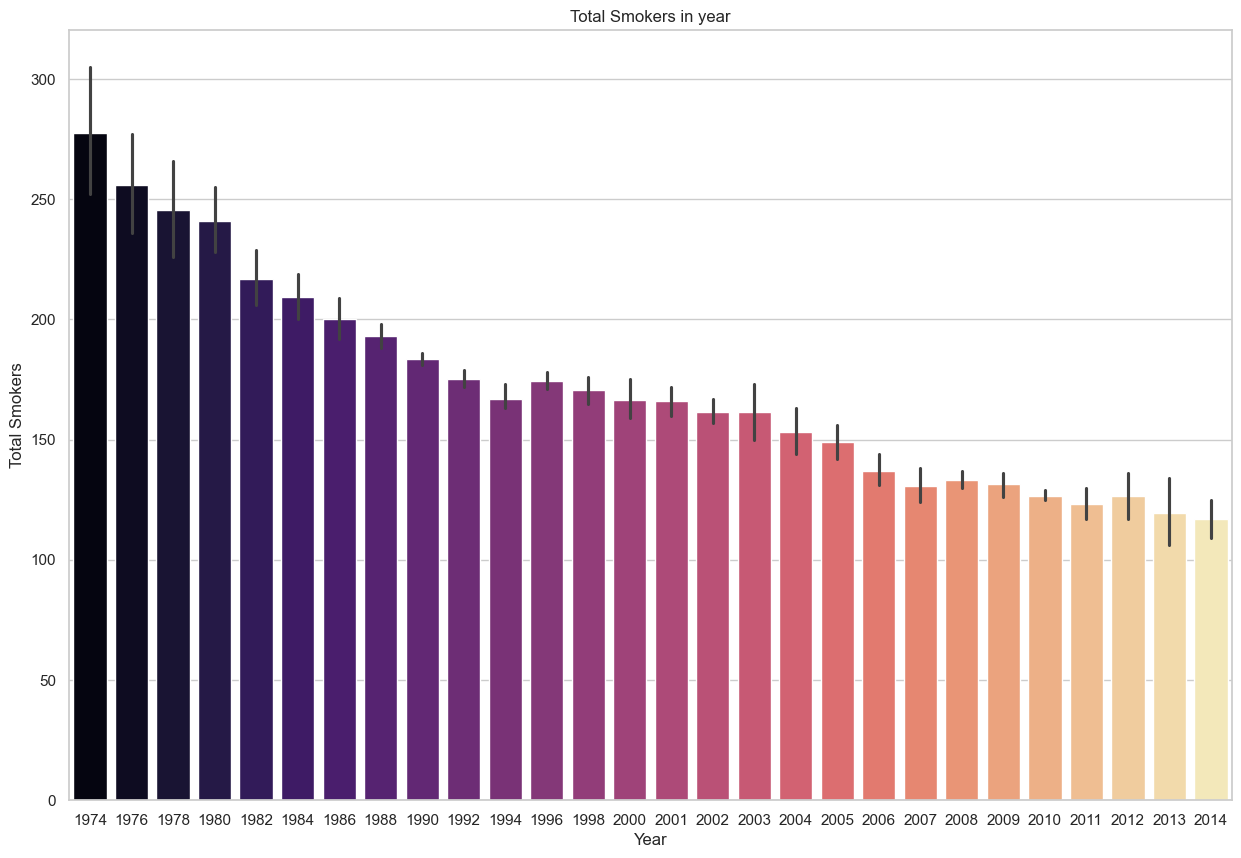

In [53]:
# How many total smokers in each year
plt.figure(figsize=(15,10))
sns.barplot(x = smokers['Year'], y = smokers['Total'], palette='magma')
plt.title('Total Smokers in year')
plt.xlabel('Year')
plt.ylabel('Total Smokers')
plt.show()

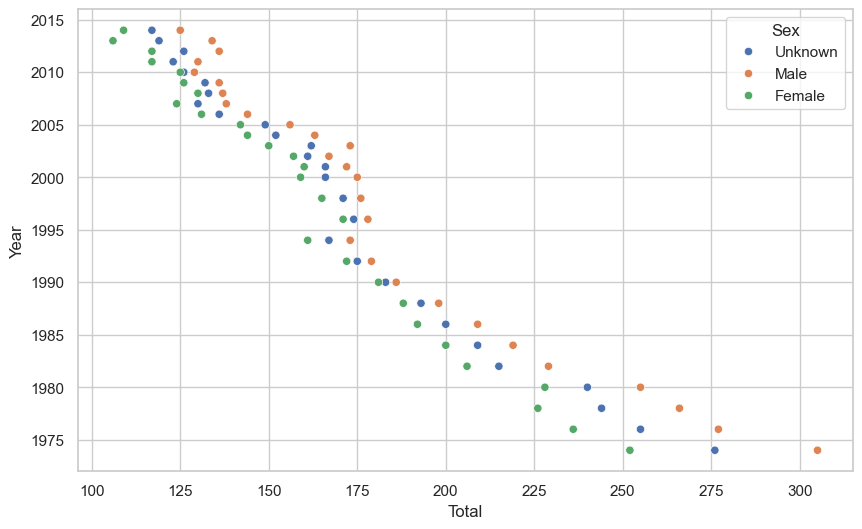

In [55]:
# How many total smokers in each year according to the Sex
sns.scatterplot(data=smokers, x='Total', y= 'Year', hue = 'Sex')
plt.show()

In [58]:
# Convert Sex Column as Numeric like Male as 2, Female as 1 and Unknown as 0
smokers['Sex'] = smokers['Sex'].apply({'Male':2, 'Female':1,'Unknown':2}.get)

In [59]:
# Convert Method Column as Numeric like Weighted as 1 and Unweighted as 0
smokers['Method'] = smokers['Method'].apply({'Weighted':1, 'Unweighted':0}.get)

In [61]:
smokers.head()

,Year,Method,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over,Total
0,1974,0,2,46,44,51,52,50,33,276
1,1976,0,2,42,42,45,48,48,30,255
2,1978,0,2,40,39,45,45,45,30,244
3,1980,0,2,39,37,46,44,45,29,240
4,1982,0,2,35,35,38,39,41,27,215


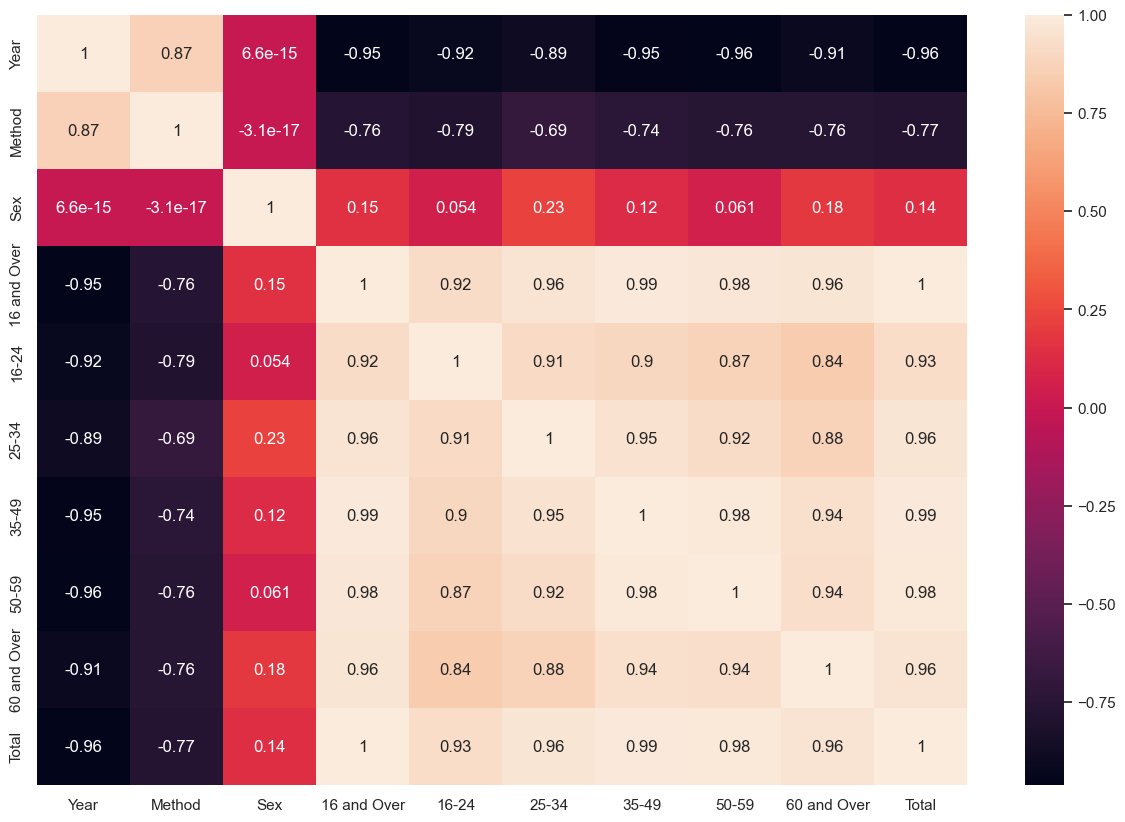

In [63]:
# Check Correlation between them
plt.figure(figsize=(15,10))
sns.heatmap(smokers.corr(), annot=True)
plt.show()

In [65]:
X = smokers.drop(columns = ['Method'])
y = smokers['Method']

In [67]:
X

,Year,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over,Total
0,1974,2,46,44,51,52,50,33,276
1,1976,2,42,42,45,48,48,30,255
2,1978,2,40,39,45,45,45,30,244
3,1980,2,39,37,46,44,45,29,240
4,1982,2,35,35,38,39,41,27,215
...,...,...,...,...,...,...,...,...,...
79,2010,1,20,24,25,23,20,13,125
80,2011,1,19,24,21,23,18,12,117
81,2012,1,19,23,23,21,19,12,117
82,2013,1,17,20,20,20,19,10,106


In [69]:
y

0     0
1     0
2     0
3     0
4     0
     ..
79    1
80    1
81    1
82    1
83    1
Name: Method, Length: 84, dtype: int64

In [71]:
X.values

array([[1974,    2,   46,   44,   51,   52,   50,   33,  276],
       [1976,    2,   42,   42,   45,   48,   48,   30,  255],
       [1978,    2,   40,   39,   45,   45,   45,   30,  244],
       [1980,    2,   39,   37,   46,   44,   45,   29,  240],
       [1982,    2,   35,   35,   38,   39,   41,   27,  215],
       [1984,    2,   34,   35,   38,   37,   39,   26,  209],
       [1986,    2,   33,   35,   36,   36,   35,   25,  200],
       [1988,    2,   32,   33,   36,   36,   33,   23,  193],
       [1990,    2,   30,   35,   35,   33,   29,   21,  183],
       [1992,    2,   28,   33,   34,   31,   29,   20,  175],
       [1994,    2,   27,   34,   32,   30,   27,   17,  167],
       [1996,    2,   28,   35,   36,   30,   27,   18,  174],
       [1998,    2,   27,   36,   35,   30,   27,   16,  171],
       [2000,    2,   27,   32,   35,   29,   27,   16,  166],
       [2001,    2,   27,   33,   34,   29,   26,   17,  166],
       [2002,    2,   26,   32,   34,   28,   26,   15,

In [72]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42)

In [75]:
X_train.shape, X_test.shape

((58, 9), (26, 9))

In [77]:
X_train

array([[1984,    2,   34,   35,   38,   37,   39,   26,  209],
       [2004,    2,   26,   30,   35,   31,   26,   15,  163],
       [1980,    2,   42,   38,   47,   45,   47,   36,  255],
       [1986,    2,   35,   36,   37,   37,   35,   29,  209],
       [2003,    2,   28,   33,   38,   32,   26,   16,  173],
       [2014,    1,   17,   21,   22,   20,   18,   11,  109],
       [2003,    2,   26,   32,   34,   30,   25,   15,  162],
       [1990,    1,   29,   36,   34,   33,   29,   20,  181],
       [1988,    2,   32,   33,   36,   36,   33,   23,  193],
       [1996,    1,   28,   34,   34,   30,   26,   19,  171],
       [1974,    1,   41,   41,   47,   49,   48,   26,  252],
       [2006,    2,   22,   25,   30,   25,   22,   12,  136],
       [2000,    1,   25,   32,   32,   27,   28,   15,  159],
       [2012,    2,   20,   22,   27,   23,   21,   13,  126],
       [2012,    2,   22,   22,   32,   25,   22,   13,  136],
       [2000,    2,   27,   32,   35,   29,   27,   16,

In [78]:
y_train

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
model =  RandomForestClassifier()

In [82]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
y_pred = model.predict(X_test)

In [85]:
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1], dtype=int64)

In [87]:
y_test

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [88]:
model.score(X_train, y_train)

1.0

In [89]:
model.score(X_test, y_test)

0.8846153846153846

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.79      1.00      0.88        11

    accuracy                           0.88        26
   macro avg       0.89      0.90      0.88        26
weighted avg       0.91      0.88      0.89        26



In [91]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 0, 11]], dtype=int64)

In [92]:
accuracy_score(y_test, y_pred)

0.8846153846153846

In [93]:
roc_auc_score(y_test, y_pred)

0.9

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.79      1.00      0.88        11

    accuracy                           0.88        26
   macro avg       0.89      0.90      0.88        26
weighted avg       0.91      0.88      0.89        26



In [95]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 0, 11]], dtype=int64)

# Smoking Prevalence Dataset – Summary & Insights
This analysis explores the trends in smoking prevalence across different age groups in the UK from 2004 to 2014, using population-level survey data.

## Key Findings:
* Overall decline in smoking rates: There was a significant reduction of over 6% in smoking  prevalence among individuals aged 16 and over between 2004 and 2014.
* Age group trends:
 * Smoking was consistently highest among 25–34-year-olds, peaking around 30% in early years.
 * Older adults (60+) had the lowest prevalence, staying below 15%.
 * Year-on-year improvement: Most age groups saw a steady decline in smoking rates, reflecting effective public health interventions.
 * Visual heatmaps and bar plots confirmed that smoking has become less common across all demographics, particularly among younger and middle-aged adults.

## Visuals Used:
* Line plots of trends by age group
* Heatmaps showing prevalence by year and age
* Bar plots comparing start and end values
* Percentage drop chart illustrating overall progress